# Deep Learning A Z Recorrente - Múltiplos previsores

In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 31.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

In [ ]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

('1.25.2', '2.0.3', '3.7.1', '2.16.1', '1.2.2')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [ ]:
base_treinamento = base.iloc[:, 1:7].values

In [ ]:
base_treinamento

array([[1.9990000e+01, 2.0209999e+01, 1.9690001e+01, 1.9690001e+01,
        1.8086271e+01, 3.0182600e+07],
       [1.9809999e+01, 2.0400000e+01, 1.9700001e+01, 2.0400000e+01,
        1.8738441e+01, 3.0552600e+07],
       [2.0330000e+01, 2.0620001e+01, 2.0170000e+01, 2.0430000e+01,
        1.8766001e+01, 3.6141000e+07],
       ...,
       [1.5990000e+01, 1.6139999e+01, 1.5980000e+01, 1.6049999e+01,
        1.6017963e+01, 2.3552200e+07],
       [1.6100000e+01, 1.6129999e+01, 1.6000000e+01, 1.6100000e+01,
        1.6067865e+01, 1.9011500e+07],
       [1.6100000e+01, 1.6100000e+01, 1.6100000e+01, 1.6100000e+01,
        1.6067865e+01, 0.0000000e+00]])

In [ ]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [ ]:
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento[:,0:1])

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [ ]:
base_treinamento_normalizada

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [ ]:
X = [] # previsores
y = [] # preço real
for i in range(90, 1242): # 90 preços anteriores
  X.append(base_treinamento_normalizada[i - 90:i, 0:6])
  y.append(base_treinamento_normalizada[i, 0])
  #print(i, i - 90)
X, y = np.array(X), np.array(y)

In [ ]:
X[0], y[0]

(array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
         0.04318274],
        [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
         0.0437121 ],
        [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
         0.05170752],
        [0.78875969, 0.7949588 , 0.81013311, 0.77996075, 0.70144373,
         0.04015963],
        [0.77083338, 0.77363063, 0.78505624, 0.75147351, 0.67522435,
         0.0416214 ],
        [0.74806197, 0.75618037, 0.78505624, 0.76031438, 0.68336137,
         0.03485382],
        [0.75436047, 0.76490543, 0.78915051, 0.76768177, 0.69014234,
         0.02507502],
        [0.75823643, 0.76442079, 0.79733884, 0.77013751, 0.6924025 ,
         0.0260728 ],
        [0.76598837, 0.77411537, 0.79682707, 0.76227897, 0.68516964,
         0.0404927 ],
        [0.76598837, 0.77411537, 0.79682707, 0.76719061, 0.68969016,
         0.0423977 ],
        [0.76017437, 0.75714973, 0.79222108, 0.76817293, 0.69059437,
         0.02401858],

In [ ]:
X.shape

(1152, 90, 6)

In [ ]:
y.shape

(1152,)

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 90, 100)             │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 90, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 90, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,451 (443.17 KB)

 Trainable params: 113,451 (443.17 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1) # 0.00000..1
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='pesos.keras', monitor='loss', save_best_only=True, verbose = 1)

In [ ]:
regressor.fit(X, y, epochs = 100, batch_size=32, callbacks=[es, rlr, mcp])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0701 - mean_absolute_error: 0.1957
Epoch 1: loss improved from inf to 0.03114, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - loss: 0.0691 - mean_absolute_error: 0.1939 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0085 - mean_absolute_error: 0.0712
Epoch 2: loss improved from 0.03114 to 0.00851, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.0085 - mean_absolute_error: 0.0712 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0089 - mean_absolute_error: 0.0739
Epoch 3: loss did not improve from 0.00851
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0089 - mean_absolute_error: 0.0738 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0082 - mean_absolute_error: 0.0701
Epoch 4: loss improved from 0.00851 to 0.00772, saving model to pesos.keras
36/36 ━━━

In [ ]:
base_teste = pd.read_csv('petr4_teste.csv')
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [ ]:
y_teste = base_teste.iloc[:, 1:2].values
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [ ]:
frames = [base, base_teste]

In [ ]:
frames

[            Date       Open       High        Low      Close  Adj Close  \
 0     2013-01-02  19.990000  20.209999  19.690001  19.690001  18.086271   
 1     2013-01-03  19.809999  20.400000  19.700001  20.400000  18.738441   
 2     2013-01-04  20.330000  20.620001  20.170000  20.430000  18.766001   
 3     2013-01-07  20.480000  20.670000  19.950001  20.080000  18.444506   
 4     2013-01-08  20.110001  20.230000  19.459999  19.500000  17.911745   
 ...          ...        ...        ...        ...        ...        ...   
 1240  2017-12-25  15.750000  15.750000  15.750000  15.750000  15.718563   
 1241  2017-12-26  15.750000  15.990000  15.690000  15.970000  15.938125   
 1242  2017-12-27  15.990000  16.139999  15.980000  16.049999  16.017963   
 1243  2017-12-28  16.100000  16.129999  16.000000  16.100000  16.067865   
 1244  2017-12-29  16.100000  16.100000  16.100000  16.100000  16.067865   
 
           Volume  
 0     30182600.0  
 1     30552600.0  
 2     36141000.0  
 3    

In [ ]:
base_completa = pd.concat(frames)
base_completa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
17,2018-01-25,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
18,2018-01-26,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
19,2018-01-29,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
20,2018-01-30,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [ ]:
base_completa = base_completa.drop('Date', axis = 1)

In [ ]:
len(base_completa), len(base_teste), len(base_completa) - len(base_teste) - 90

(1264, 22, 1152)

In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [ ]:
entradas

array([[1.3930000e+01, 1.4030000e+01, 1.3760000e+01, 1.3870000e+01,
        1.3842316e+01, 2.7208100e+07],
       [1.3760000e+01, 1.3850000e+01, 1.3680000e+01, 1.3850000e+01,
        1.3822356e+01, 2.7306400e+07],
       [1.3790000e+01, 1.3900000e+01, 1.3440000e+01, 1.3450000e+01,
        1.3423154e+01, 5.8871700e+07],
       [1.3530000e+01, 1.3770000e+01, 1.3470000e+01, 1.3650000e+01,
        1.3622754e+01, 8.2909400e+07],
       [1.3850000e+01, 1.4190000e+01, 1.3820000e+01, 1.4020000e+01,
        1.3992017e+01, 6.0260300e+07],
       [1.3960000e+01, 1.4180000e+01, 1.3940000e+01, 1.4170000e+01,
        1.4141717e+01, 1.8139300e+07],
       [1.4570000e+01, 1.4650000e+01, 1.4230000e+01, 1.4410000e+01,
        1.4381238e+01, 5.6476800e+07],
       [1.4650000e+01, 1.5020000e+01, 1.4510000e+01, 1.5020000e+01,
        1.4990021e+01, 6.8418200e+07],
       [1.5020000e+01, 1.5020000e+01, 1.5020000e+01, 1.5020000e+01,
        1.4990021e+01, 0.0000000e+00],
       [1.5100000e+01, 1.5150000e+01,

In [ ]:
entradas = normalizador.transform(entradas)
entradas

array([[0.47141473, 0.47309743, 0.49334698, 0.47495091, 0.47495089,
        0.03892707],
       [0.46317829, 0.46437227, 0.48925281, 0.47396859, 0.47396857,
        0.03906771],
       [0.46463178, 0.46679593, 0.47697032, 0.45432222, 0.45432219,
        0.0842287 ],
       [0.45203488, 0.46049443, 0.47850563, 0.46414541, 0.46414533,
        0.11861983],
       [0.46753876, 0.48085313, 0.4964176 , 0.48231829, 0.48231829,
        0.08621539],
       [0.47286822, 0.4803684 , 0.50255885, 0.48968568, 0.48968565,
        0.02595219],
       [0.50242248, 0.50315075, 0.5174002 , 0.5014735 , 0.50147347,
        0.08080228],
       [0.50629845, 0.5210858 , 0.53172979, 0.53143421, 0.53143421,
        0.09788703],
       [0.52422481, 0.5210858 , 0.55783009, 0.53143421, 0.53143421,
        0.        ],
       [0.52810078, 0.5273873 , 0.54094166, 0.51620828, 0.51620824,
        0.05198851],
       [0.51744186, 0.52253999, 0.54708291, 0.52996073, 0.52996068,
        0.04995475],
       [0.52228682, 0

In [ ]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0:6])
X_teste = np.array(X_teste)

In [ ]:
X_teste.shape

(22, 90, 6)

In [ ]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


In [ ]:
previsoes

array([[0.57422626],
       [0.5783905 ],
       [0.5838324 ],
       [0.5913137 ],
       [0.59954387],
       [0.60720694],
       [0.61361885],
       [0.61733395],
       [0.61922556],
       [0.6208992 ],
       [0.6234176 ],
       [0.6282366 ],
       [0.6379777 ],
       [0.6518453 ],
       [0.6659459 ],
       [0.6767528 ],
       [0.681923  ],
       [0.68641883],
       [0.6932488 ],
       [0.7053482 ],
       [0.72107637],
       [0.73434585]], dtype=float32)

In [ ]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [ ]:
previsoes

array([[16.052029],
       [16.13798 ],
       [16.2503  ],
       [16.404715],
       [16.574585],
       [16.73275 ],
       [16.865093],
       [16.941772],
       [16.980816],
       [17.01536 ],
       [17.067339],
       [17.166803],
       [17.367859],
       [17.654085],
       [17.945122],
       [18.168177],
       [18.274889],
       [18.367683],
       [18.508656],
       [18.758387],
       [19.083015],
       [19.356897]], dtype=float32)

In [ ]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [ ]:
previsoes.mean()

17.439743

In [ ]:
y_teste.mean()

17.87454563636364

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

0.44042001080322263

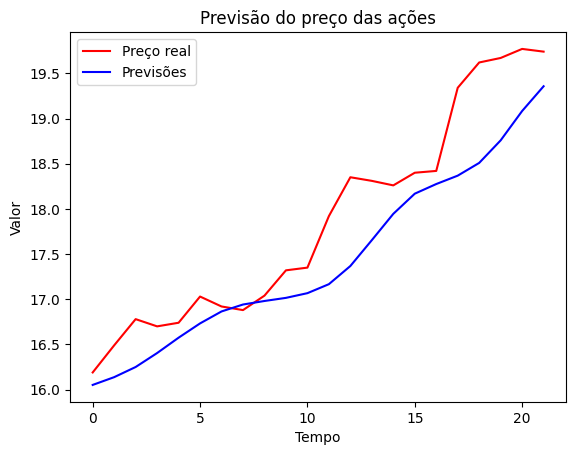

In [ ]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend();